### Problem Statement:

The objective of this study is to segment the similar user and similar items in to clusters. Understanding the common charecteristic of each group will help the organization to promote their bussiness.

The datasets used in this work contain measurements of clothing fit from RentTheRunway.

RentTheRunWay is a unique platform that allows women to rent clothes for various occasions; we collected data from several categories. These datasets contain self-reported fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers’ measurements (etc.). In this datasets, fit feedback belongs to one of three classes: ‘Small,’ ‘Fit,’ and ‘Large.’

FILE DESCRIPTION
These datasets contain measurements of clothing fit from RentTheRunway.
	                  
1. Number of users:	    105,508
2. Number of items:	    5,850
3. Number of transactions:	192,544

Metadata:
    1. ratings and reviews
    2. fit feedback (small/fit/large etc.)
    3. user/item measurements 
    4. category information
    
Data Citation:
Decomposing fit semantics for product size recommendation in metric spaces
Rishabh Misra, Mengting Wan, Julian McAuley
RecSys, 2018

Weblink for data:
https://cseweb.ucsd.edu/~jmcauley/datasets.html#clothing_fit

We have altered this dataset by deriving some new columns which has been computed by applying text analytics statergies on the review column of data.

Appropriate features need to be selected for user segmentation(clustering) and Item Segmentation (clustering) process.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [2]:
df=pd.read_csv('final_cluster_data_cloth.csv')

In [3]:
df.head(2)

,fit,user_id,item_id,weight,rating,rented for,body type,category,height,size,...,text_compound,text_neg,text_neu,text_pos,sum_compound,sum_neg,sum_neu,sum_pos,size1,size2
0,fit,420272,2260466,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,...,0.9453,0.021,0.676,0.303,0.9453,0.0,0.379,0.621,0.708333,d
1,fit,273551,153475,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,...,0.8991,0.046,0.696,0.258,0.8991,0.0,0.387,0.613,0.708333,b


In [4]:
df.columns

Index(['fit', 'user_id', 'item_id', 'weight', 'rating', 'rented for',
       'body type', 'category', 'height', 'size', 'age', 'review_sum_Pol',
       'review_sum_Subj', 'review_text__Pol', 'review_text_Subj',
       'text_compound', 'text_neg', 'text_neu', 'text_pos', 'sum_compound',
       'sum_neg', 'sum_neu', 'sum_pos', 'size1', 'size2'],
      dtype='object')

In [5]:
df.shape

(192544, 25)

In [6]:
# Make the user_id and item_id as index as we are not going to use those for clustering purpose
# but we need this at the end to identify the users and items in each cluster
df=df.set_index(['user_id','item_id'])

In [7]:
df.columns

Index(['fit', 'weight', 'rating', 'rented for', 'body type', 'category',
       'height', 'size', 'age', 'review_sum_Pol', 'review_sum_Subj',
       'review_text__Pol', 'review_text_Subj', 'text_compound', 'text_neg',
       'text_neu', 'text_pos', 'sum_compound', 'sum_neg', 'sum_neu', 'sum_pos',
       'size1', 'size2'],
      dtype='object')

In [9]:
# Clean the Height column and convert the height from feet to cms
df['height']=df['height'].str.replace("'",' ')
df['height']=df['height'].str.replace('"',' ')

In [10]:
#df['height'].str.split(" ",expand=True)

In [11]:
df['height']=df['height'].str.split("  ",expand=True)[0].astype('float')*30 + df['height'].str.split("  ",expand=True)[1].astype('float')*2.54

In [12]:
#df['height']

In [13]:
# find the correaltion between the numerica features to understand the data
# Perform some other EDA visuals also to understand the data nature
df.corr()

,weight,rating,height,size,age,review_sum_Pol,review_sum_Subj,review_text__Pol,review_text_Subj,text_compound,text_neg,text_neu,text_pos,sum_compound,sum_neg,sum_neu,sum_pos,size1
weight,1.000000,-0.022494,0.383636,0.850962,0.066194,-0.002390,-0.013912,-0.003793,-0.008414,-0.000879,0.020558,0.014724,-0.020312,-0.000879,0.001330,0.021657,-0.021761,0.642023
rating,-0.022494,1.000000,0.001768,-0.036731,-0.035280,0.215212,0.101682,0.266534,0.144264,0.310849,-0.201955,-0.223824,0.274740,0.310849,-0.208049,-0.159906,0.211767,-0.019586
height,0.383636,0.001768,1.000000,0.228851,-0.007414,-0.010416,-0.006706,-0.005761,-0.002767,0.004022,0.001865,0.004934,-0.005314,0.004022,0.005994,0.007346,-0.008859,0.156565
size,0.850962,-0.036731,0.228851,1.000000,0.155687,-0.004459,-0.012766,-0.013055,-0.013893,-0.011234,0.024933,0.024483,-0.030766,-0.011234,-0.000061,0.026046,-0.025369,0.660161
age,0.066194,-0.035280,-0.007414,0.155687,1.000000,-0.016522,0.023089,0.036861,0.020361,-0.075898,0.001067,-0.041649,0.039844,-0.075898,0.001542,-0.020327,0.019644,0.171436
review_sum_Pol,-0.002390,0.215212,-0.010416,-0.004459,-0.016522,1.000000,0.694668,0.112297,0.056649,0.100896,-0.067026,-0.088531,0.104937,0.100896,-0.187503,-0.488349,0.528601,0.001250
review_sum_Subj,-0.013912,0.101682,-0.006706,-0.012766,0.023089,0.694668,1.000000,0.044936,0.055022,0.040610,-0.029287,-0.038658,0.045909,0.040610,-0.021277,-0.522082,0.517914,-0.007540
review_text__Pol,-0.003793,0.266534,-0.005761,-0.013055,0.036861,0.112297,0.044936,1.000000,0.569357,0.363993,-0.229257,-0.554311,0.601005,0.363993,-0.070234,-0.088209,0.105021,0.011267
review_text_Subj,-0.008414,0.144264,-0.002767,-0.013893,0.020361,0.056649,0.055022,0.569357,1.000000,0.246178,-0.053143,-0.409269,0.410077,0.246178,-0.029650,-0.069004,0.075663,0.005036
text_compound,-0.000879,0.310849,0.004022,-0.011234,-0.075898,0.100896,0.040610,0.363993,0.246178,1.000000,-0.453214,-0.280845,0.402929,1.000000,-0.119579,-0.083602,0.113660,-0.004610


In [14]:
#Treatment of the categorical data
cat_data=df.select_dtypes(exclude=np.number)
cat_data.head(2)

,,fit,rented for,body type,category,size2
user_id,item_id,,,,,
420272,2260466,fit,vacation,hourglass,romper,d
273551,153475,fit,other,straight & narrow,gown,b


In [15]:
df['fit'].value_counts()

fit      142058
small     25779
large     24707
Name: fit, dtype: int64

In [16]:
df['fit']=df['fit'].replace({'fit':2,'small':1,'large':3})

In [17]:
df['fit'].value_counts()

2    142058
1     25779
3     24707
Name: fit, dtype: int64

In [18]:
df['body type'].value_counts()

hourglass            55349
athletic             43667
pear                 22135
petite               22131
full bust            15006
straight & narrow    14742
apple                 4877
Name: body type, dtype: int64

In [19]:
d=df.groupby('body type')['height'].mean()/df.groupby('body type')['weight'].mean()
d

body type
apple                1.034489
athletic             1.215915
full bust            1.097591
hourglass            1.140251
pear                 1.135641
petite               1.338734
straight & narrow    1.332112
dtype: float64

In [20]:
df['body type']=df['body type'].replace({'apple':1.034489,'athletic':1.215915,
                        'full bust':1.097591,'hourglass':1.140251,
                        'pear':1.135641,'petite':1.338734,'straight & narrow':1.332112})

In [21]:
df=df.drop('category',1)

In [22]:
df['size2'].unique()

array(['d', 'b', nan, 'c', 'd+', 'a', 'dd', 'ddd/e', 'f', 'g', 'aa', 'i',
       'h', 'j'], dtype=object)

In [23]:
df['size2']=df.replace({'a':1,'aa':2,'b':3,'c':4,'d':5,'d+':6,'dd':7,'ddd/e':8,
            'f':9,'g':10,'h':11,'i':12,'j':13})

In [24]:
df['size2']=df['size2'].astype('float')

In [25]:
df['rented for']=df['rented for'].replace('party: cocktail','party')

In [26]:
df=pd.get_dummies(df)
df.head()

,,fit,weight,rating,body type,height,size,age,review_sum_Pol,review_sum_Subj,review_text__Pol,...,size1,size2,rented for_date,rented for_everyday,rented for_formal affair,rented for_other,rented for_party,rented for_vacation,rented for_wedding,rented for_work
user_id,item_id,,,,,,,,,,,,,,,,,,,,,
420272,2260466,2,137.0,10.0,1.140251,170.32,14,28.0,0.625000,0.500000,0.181548,...,0.708333,2.0,0,0,0,0,0,1,0,0
273551,153475,2,132.0,10.0,1.332112,165.24,12,36.0,0.000000,0.000000,0.360667,...,0.708333,2.0,0,0,0,1,0,0,0,0
360448,1063761,2,NaN,10.0,NaN,160.16,4,116.0,0.525000,0.541667,0.489762,...,NaN,2.0,0,0,0,0,1,0,0,0
909926,126335,2,135.0,8.0,1.135641,162.70,8,34.0,1.000000,1.000000,0.213056,...,0.708333,2.0,0,0,1,0,0,0,0,0
151944,616682,2,145.0,10.0,1.215915,172.86,12,27.0,0.976562,0.600000,-0.054028,...,0.708333,2.0,0,0,0,0,0,0,1,0


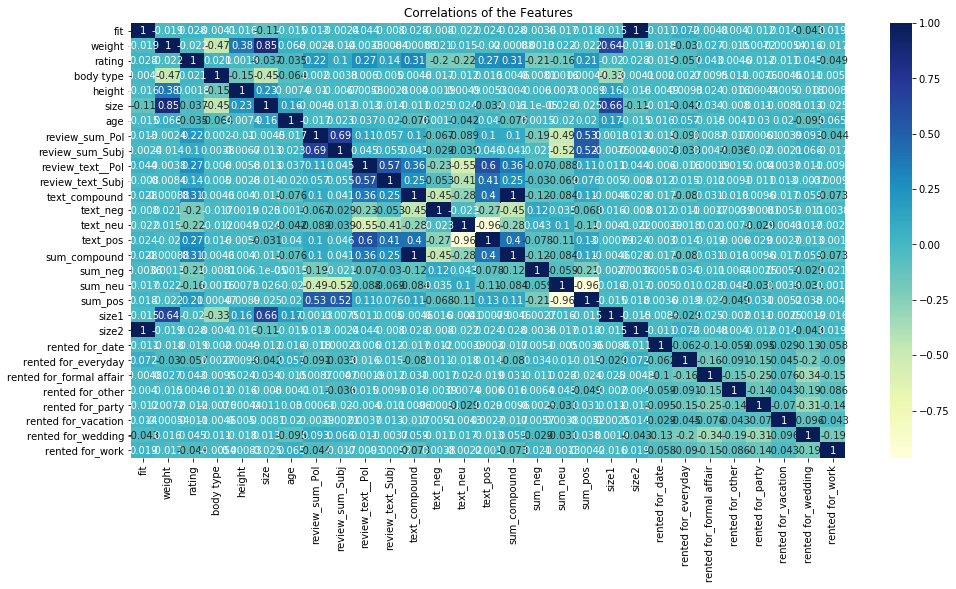

In [27]:
plt.figure(figsize=[16,8])
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlations of the Features')
plt.show()

In [28]:
#i = sns.pairplot(df ,hue='assigned condition', palette='husl')
#plt.show()

In [29]:
df.shape

(192544, 29)

In [30]:
# Missing value Treatment
df.isnull().sum()/len(df)*100

fit                          0.000000
weight                      15.571506
rating                       0.042588
body type                    7.601899
height                       0.351608
size                         0.000000
age                          0.498587
review_sum_Pol               0.000000
review_sum_Subj              0.000000
review_text__Pol             0.000000
review_text_Subj             0.000000
text_compound                0.000000
text_neg                     0.000000
text_neu                     0.000000
text_pos                     0.000000
sum_compound                 0.000000
sum_neg                      0.000000
sum_neu                      0.000000
sum_pos                      0.000000
size1                        9.561970
size2                        0.000000
rented for_date              0.000000
rented for_everyday          0.000000
rented for_formal affair     0.000000
rented for_other             0.000000
rented for_party             0.000000
rented for_v

In [31]:
df=df.dropna()  # Imputation statergies also explored to fill the missing values

In [32]:
df.columns

Index(['fit', 'weight', 'rating', 'body type', 'height', 'size', 'age',
       'review_sum_Pol', 'review_sum_Subj', 'review_text__Pol',
       'review_text_Subj', 'text_compound', 'text_neg', 'text_neu', 'text_pos',
       'sum_compound', 'sum_neg', 'sum_neu', 'sum_pos', 'size1', 'size2',
       'rented for_date', 'rented for_everyday', 'rented for_formal affair',
       'rented for_other', 'rented for_party', 'rented for_vacation',
       'rented for_wedding', 'rented for_work'],
      dtype='object')

In [33]:
# create the seperate list of features related to users and items
user_feat=['user_id','fit','weight','body type','height','age','size','size1',
           'size2']
item_feat=['item_id','fit','rating','review_sum_Pol', 'review_sum_Subj', 'review_text__Pol',
       'review_text_Subj', 'text_compound', 'text_neg', 'text_neu', 'text_pos',
       'sum_compound', 'sum_neg', 'sum_neu', 'sum_pos','rented for_date', 'rented for_everyday', 'rented for_formal affair',
       'rented for_other', 'rented for_party', 'rented for_vacation',
       'rented for_wedding', 'rented for_work']

In [34]:
df=df.reset_index()

In [35]:
df.head(2)

,user_id,item_id,fit,weight,rating,body type,height,size,age,review_sum_Pol,...,size1,size2,rented for_date,rented for_everyday,rented for_formal affair,rented for_other,rented for_party,rented for_vacation,rented for_wedding,rented for_work
0,420272,2260466,2,137.0,10.0,1.140251,170.32,14,28.0,0.625,...,0.708333,2.0,0,0,0,0,0,1,0,0
1,273551,153475,2,132.0,10.0,1.332112,165.24,12,36.0,0.000,...,0.708333,2.0,0,0,0,1,0,0,0,0


In [36]:
df_user=df[user_feat]

In [37]:
df_user.head(2)

,user_id,fit,weight,body type,height,age,size,size1,size2
0,420272,2,137.0,1.140251,170.32,28.0,14,0.708333,2.0
1,273551,2,132.0,1.332112,165.24,36.0,12,0.708333,2.0


In [38]:
df_user[df_user['user_id']==420272]

,user_id,fit,weight,body type,height,age,size,size1,size2
0,420272,2,137.0,1.140251,170.32,28.0,14,0.708333,2.0
12517,420272,2,137.0,1.140251,170.32,28.0,14,0.708333,2.0
32355,420272,2,137.0,1.140251,170.32,28.0,14,0.708333,2.0
46521,420272,2,137.0,1.140251,170.32,28.0,12,0.708333,2.0
53444,420272,2,137.0,1.140251,170.32,28.0,8,0.708333,2.0
102762,420272,1,137.0,1.140251,170.32,28.0,14,0.708333,1.0


In [39]:
#df_user['fit'].unique()

In [40]:
df_user1=df_user.groupby('user_id').agg({'fit':'median','weight':'median','body type':'mean','height':'median',
                               'age':'median','size':'median','size1':'median','size2':'median'})

In [41]:
df_user1['fit']=np.round(df_user1['fit'])

In [42]:
#df_user1['size2'].value_counts()

In [43]:
df_user1.shape

(77349, 8)

In [44]:
df_user1.shape

(77349, 8)

In [45]:
mm=MinMaxScaler()
df_scaled_user1=mm.fit_transform(df_user1.iloc[:,1:])
df_scaled_user1=pd.DataFrame(df_scaled_user1,columns=df_user1.columns[1:],index=df_user1.index)

In [47]:
df_scaled_user1.head(2)

,weight,body type,height,age,size,size1,size2
user_id,,,,,,,
9,0.38,0.332469,0.500000,0.273504,0.137931,0.2,0.5
25,0.32,0.207405,0.542333,0.341880,0.137931,0.3,0.5


In [48]:
df_user['fit'].value_counts()

2    107740
1     19622
3     19026
Name: fit, dtype: int64

## Cluster the users based on user features

**K-MEANS CLUSTERING ALGORITHM:**

**Finding the best K value:**

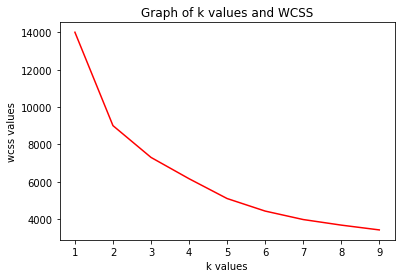

In [43]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled_user1)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

In [49]:
# Model with k=3:
kmeans2 = KMeans(n_clusters=3)
# Training the model:
m1=kmeans2.fit(df_scaled_user1)
clusters = m1.predict(df_scaled_user1)

In [50]:
kmean_out=df_user1.copy()
kmean_out['Label']=m1.labels_

In [51]:
kmean_out.iloc[:,1:].groupby('Label').mean()

,weight,body type,height,age,size,size1,size2
Label,,,,,,,
0,120.242137,1.336227,160.252480,32.770598,5.990967,0.692526,1.994343
1,142.719699,1.156959,164.075638,33.835319,12.897956,0.716569,2.121613
2,143.968279,1.157386,164.192441,34.051562,15.403613,0.718708,1.141396


The above table showing the feature mean values for each cluster and we can see resonable difference in these values across differnt groups. 

Comparing the cluster labels with 'fit' column of this dataset will reveal the nature/quality of this clustering process.

In [52]:
print('Predicted Data Classes:')
print(kmean_out['Label'].value_counts())

Predicted Data Classes:
1    52301
0    16883
2     8165
Name: Label, dtype: int64


In [53]:
kmean_out.head(2)

,fit,weight,body type,height,age,size,size1,size2,Label
user_id,,,,,,,,,
9,2.0,145.0,1.135641,165.24,32.0,8.0,0.666667,2.0,1
25,2.0,130.0,1.097591,167.78,40.0,8.0,0.708333,2.0,1


In [54]:
pd.crosstab(kmean_out['Label'],kmean_out['fit'])

fit,1.0,2.0,3.0
Label,,,
0,1516,13893,1474
1,0,46943,5358
2,5856,2309,0


#### From the above table, we can clearly see 
#### Cluster 0 and cluster 1 contains more of fit 2
#### Cluster 2 contains more of fit 1(small)
#### Cluster 2 does not contain any fit 3 (large)
#### Cluster 1 does not contain any fit 1 (small)

#### There is some overlapping between fit and large, but small group is very much discriminative. 

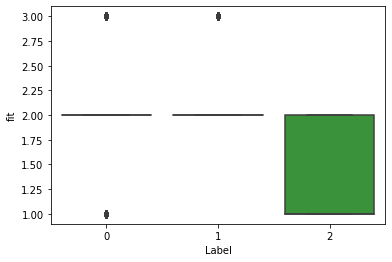

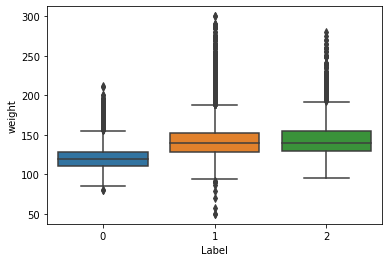

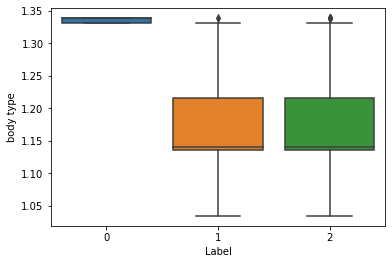

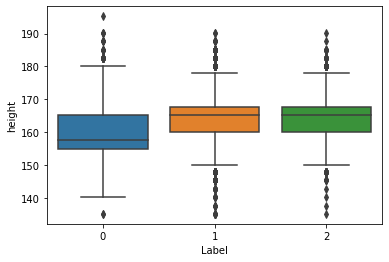

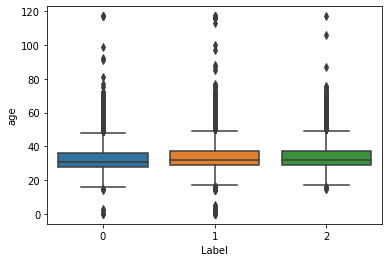

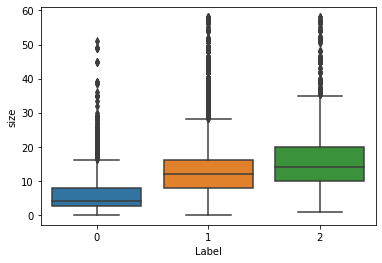

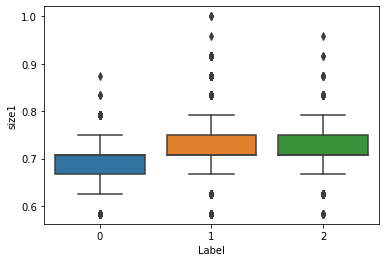

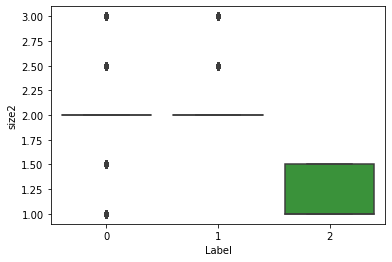

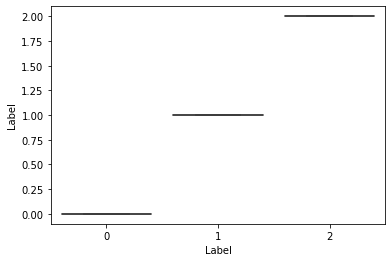

In [55]:
# Perform some EDA to understand the charecteristics of each cluster
import seaborn as sb
for i in kmean_out.columns:
    sb.boxplot(kmean_out['Label'],kmean_out[i])
    plt.show()

In [56]:
from sklearn.model_selection import train_test_split
df_userv1,df_userv2=train_test_split(df_user1,test_size=0.8,random_state=48)

In [57]:
df_userv1.shape

(15469, 8)

In [63]:
df_userv1['fit'].value_counts(normalize=True)

2.0    0.812399
1.0    0.097679
3.0    0.089922
Name: fit, dtype: float64

In [64]:
df_user1['fit'].value_counts(normalize=True)

2.0    0.816365
1.0    0.095308
3.0    0.088327
Name: fit, dtype: float64

In [59]:
mm=MinMaxScaler()
df_scaled_userv1=mm.fit_transform(df_userv1.iloc[:,1:])
df_scaled_userv1=pd.DataFrame(df_scaled_userv1,columns=df_userv1.columns[1:],index=df_userv1.index)

In [60]:
# compute Silhoutee score
from sklearn.metrics import silhouette_score
sil=[]
cl=[2,3,4,5,6]
for k in cl:
    mod=KMeans(k)
    mod.fit(df_scaled_userv1)
    score=silhouette_score(df_scaled_userv1,mod.labels_)
    print(score)
    sil.append(score)

0.3957361249946295
0.35184252632625984
0.369839811509504
0.307794324552213
0.29898160714866984


In [105]:
#df_userv1.head(2)

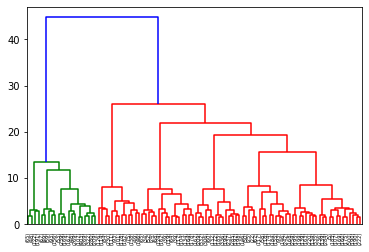

In [61]:
# Using Hierarichal Clustering
from scipy.cluster.hierarchy import linkage , dendrogram, fcluster,cophenet
mergings = linkage(df_scaled_userv1, method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',p=100)
plt.show()

In [125]:
pd.DataFrame(mergings)

,0,1,2,3
0,1001.0,2646.0,0.000000,2.0
1,1185.0,5787.0,0.000000,2.0
2,12715.0,15470.0,0.000000,3.0
3,1087.0,10293.0,0.000000,2.0
4,1368.0,13152.0,0.000000,2.0
...,...,...,...,...
15463,30924.0,30929.0,15.808248,5938.0
15464,30928.0,30932.0,19.312291,8955.0
15465,30926.0,30933.0,21.848936,10444.0
15466,30927.0,30934.0,26.313976,12084.0


In [62]:
for i in [10,15,20,21,22,25,26,27,30,35,40]:
    clusters = fcluster(mergings, i, criterion='distance')
    print('The number of cluster for the distance of', i,' is ', len(np.unique(clusters)))

The number of cluster for the distance of 10  is  8
The number of cluster for the distance of 15  is  6
The number of cluster for the distance of 20  is  4
The number of cluster for the distance of 21  is  4
The number of cluster for the distance of 22  is  3
The number of cluster for the distance of 25  is  3
The number of cluster for the distance of 26  is  3
The number of cluster for the distance of 27  is  2
The number of cluster for the distance of 30  is  2
The number of cluster for the distance of 35  is  2
The number of cluster for the distance of 40  is  2


from around 27 to 40 the cluster remain as 2. From distance 22 to 26 the cluster remain as 3. so k = 2 could be better choice of cluster, but k=3 also consider for this dataset as there are 3 differnt fit exist. 

In [63]:
df_scaled_userv1.shape

(15469, 7)

In [64]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = df_scaled_userv1.shape[1])
pca_data = pca.fit_transform(df_scaled_userv1)
exp_var_ratio= pca.explained_variance_ratio_
exp_var_ratio.round(3)

cum_var=exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var=cum_var+j
    if cum_var >= 0.95:
        break
    itr=itr+1

print('The number of principle components capturing 90 percent varaition is data is : ',itr,' Varaince explained is ', cum_var)

The number of principle components capturing 90 percent varaition is data is :  5  Varaince explained is  0.9744354325954112


Text(0, 0.5, 'Variance Ratio')

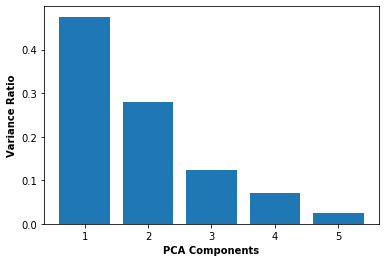

In [65]:
# Variance Ratio bar plot for each PCA components.
pc=exp_var_ratio[:itr]
ax = plt.bar(range(1,len(pc)+1), pc)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

In [66]:
#Select only 5 PCs
pcadata=pca_data[:,:itr]
pcadata.shape

(15469, 5)

In [67]:
pd.DataFrame(pcadata).corr().round()

,0,1,2,3,4
0,1.0,-0.0,0.0,0.0,-0.0
1,-0.0,1.0,-0.0,0.0,-0.0
2,0.0,-0.0,1.0,0.0,-0.0
3,0.0,0.0,0.0,1.0,0.0
4,-0.0,-0.0,-0.0,0.0,1.0


Text(0, 0.5, 'Cumulative Explained Variance')

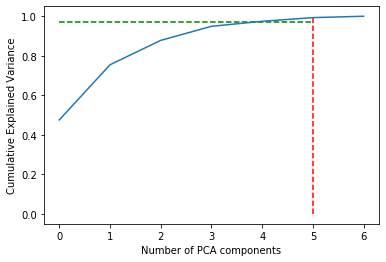

In [70]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=5, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.97, xmax=5, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

In [71]:
# Checking which attributes are well explained by the pca components
attributes_pca=pd.DataFrame()
for i in range(5):
    attributes_pca['PC'+str(i+1)]=pca.components_[i]
attributes_pca['Attribute']=df_scaled_userv1.columns
attributes_pca

,PC1,PC2,PC3,PC4,PC5,Attribute
0,0.196488,0.010105,0.417167,0.079269,-0.199129,weight
1,-0.919053,0.078265,0.380294,0.063133,-0.015646,body type
2,0.101313,0.014517,0.400174,-0.898297,0.095649,height
3,0.025578,0.010385,0.067099,0.105528,0.947294,age
4,0.291706,0.075646,0.631305,0.343876,-0.123204,size
5,0.136777,0.011267,0.331052,0.229995,0.195980,size1
6,-0.044879,-0.993783,0.092546,0.022542,0.000883,size2


In [92]:
col=list(np.arange(1,pcadata.shape[1]+1))
col

[1, 2, 3, 4]

In [93]:
# Creating new dataframe with Principal components

df_pca_final = pd.DataFrame(pcadata, columns=col)
#df_pca_final = pd.concat([data['country'], df_pca], axis=1)
df_pca_final.head()

,1,2,3,4
0,0.272603,0.244072,0.132284,-0.056545
1,0.116181,-0.030560,-0.194250,-0.013997
2,0.171974,-0.017230,-0.064502,0.006684
3,0.171105,-0.023776,-0.085916,-0.109053
4,0.202995,-0.008789,-0.013767,0.137439


2712.048394741615
1709.5351998322192
1358.865316343148
1126.3699675175717
914.2463996058216
782.78356007433
692.078062775704
623.6637353184589
577.3818295050577
537.2692079247868
507.4540883854492
475.0756895498111


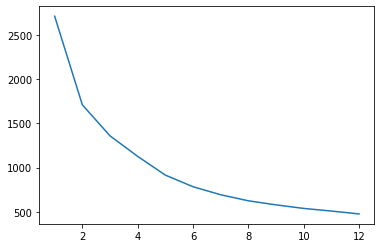

In [95]:
# K-means Clustering
wcss=[]
cl=[1,2,3,4,5,6,7,8,9,10,11,12]
for k in cl:
    mod=KMeans(k)
    mod.fit(pcadata)
    print(mod.inertia_)
    wcss.append(mod.inertia_)
plt.plot(cl,wcss)

In [96]:
# compute Silhoutee score
from sklearn.metrics import silhouette_score
sil=[]
cl=[2,3,4,5,6,7,8]
for k in cl:
    mod=KMeans(k)
    mod.fit(pcadata)
    score=silhouette_score(pcadata,mod.labels_)
    print(score)
    sil.append(score)

0.42172843639735885
0.38355001116688103
0.4045008385883346
0.3459757464416733
0.3504470182089633
0.36869710408171164
0.37762766190655184


In [133]:
cluster4 = KMeans(n_clusters=3, random_state= 100)
cluster4.fit(pcadata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [134]:
df_userv1.head(2)

,fit,weight,body type,height,age,size,size1,size2
user_id,,,,,,,,
470285,2.0,170.0,1.140251,170.32,27.0,20.0,0.750000,1.5
91665,2.0,130.0,1.140251,160.16,29.0,4.0,0.708333,2.0


In [135]:
data_userv1=df_userv1.copy()

In [136]:
# Assign the label
pcadata_df=pd.DataFrame(pcadata)
pcadata_df['Cluster_Id4'] = cluster4.labels_
data_userv1['Cluster_Id4'] = cluster4.labels_
data_userv1.head()

,fit,weight,body type,height,age,size,size1,size2,Cluster_Id4
user_id,,,,,,,,,
470285,2.0,170.0,1.140251,170.32,27.0,20.0,0.750000,1.5,2
91665,2.0,130.0,1.140251,160.16,29.0,4.0,0.708333,2.0,1
637327,2.0,135.0,1.140251,162.70,37.0,13.0,0.708333,2.0,1
355742,2.0,137.0,1.135641,167.78,34.0,8.0,0.708333,2.0,1
940796,2.0,140.0,1.140251,157.62,42.0,20.0,0.708333,2.0,1


In [137]:

data_userv1['Cluster_Id4'].value_counts()

1    10429
0     3366
2     1674
Name: Cluster_Id4, dtype: int64

In [138]:
data_userv1.groupby('Cluster_Id4').mean()

,fit,weight,body type,height,age,size,size1,size2
Cluster_Id4,,,,,,,,
0,2.006833,120.113785,1.336204,160.352805,32.809863,5.927065,0.691919,2.006536
1,2.103462,142.676575,1.157062,164.069111,33.776585,12.868108,0.716655,2.123118
2,1.270012,144.012545,1.158610,164.362664,34.192354,15.367384,0.718314,1.135006


In [120]:
pd.crosstab(data_userv1['Cluster_Id4'],data_userv1['fit'])

fit,1.0,2.0,3.0
Cluster_Id4,,,
0,289,2765,312
1,0,9350,1079
2,1222,452,0


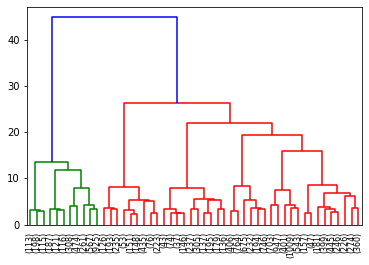

In [109]:
# Using Hierarichal Clustering
from scipy.cluster.hierarchy import linkage , dendrogram, fcluster,cophenet
mergings = linkage(pcadata, method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',p=50)
plt.show()

In [110]:
for i in [10,15,20,25,30,35,40]:
    clusters = fcluster(mergings, i, criterion='distance')
    print('The number of cluster for the distance of', i,' is ', len(np.unique(clusters)))

The number of cluster for the distance of 10  is  8
The number of cluster for the distance of 15  is  6
The number of cluster for the distance of 20  is  4
The number of cluster for the distance of 25  is  3
The number of cluster for the distance of 30  is  2
The number of cluster for the distance of 35  is  2
The number of cluster for the distance of 40  is  2


## Cluster the items based on item features

In [92]:
df_item=df[item_feat]

In [93]:
df_item1=df_item.groupby('item_id').agg({'fit':'median','rating':'mean', 'review_sum_Pol':'mean','review_sum_Subj':'mean',
       'review_text__Pol':'mean', 'review_text_Subj':'mean', 'text_compound':'mean', 'text_neg':'mean',
       'text_neu':'mean', 'text_pos':'mean', 'sum_compound':'mean', 'sum_neg':'mean', 'sum_neu':'mean','sum_pos':'mean'})

In [94]:
df_item1.head(2)

,fit,rating,review_sum_Pol,review_sum_Subj,review_text__Pol,review_text_Subj,text_compound,text_neg,text_neu,text_pos,sum_compound,sum_neg,sum_neu,sum_pos
item_id,,,,,,,,,,,,,,
123373,2.0,8.871486,0.429016,0.650976,0.280905,0.578679,0.780956,0.024580,0.736564,0.238849,0.780956,0.015153,0.527255,0.457586
123793,2.0,9.528804,0.456716,0.597070,0.300035,0.562957,0.842839,0.026008,0.725548,0.248445,0.842839,0.013798,0.556474,0.429729


In [95]:
df_item1['fit']=np.round(df_item1['fit'])

In [96]:
mm=MinMaxScaler()
df_scaled_item1=mm.fit_transform(df_item1.iloc[:,1:])
df_scaled_item1=pd.DataFrame(df_scaled_item1,columns=df_item1.columns[1:],index=df_item1.index)

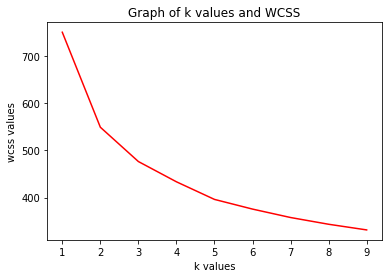

In [97]:
wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled_item1)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

In [114]:
# Model with k=6:
kmeans2 = KMeans(n_clusters=5,random_state=0)

# Training the model:
m2=kmeans2.fit(df_scaled_item1)
clusters = m2.predict(df_scaled_item1)

In [115]:
kmean_out_item=df_item1.copy()
kmean_out_item['Label']=m2.labels_

In [116]:
kmean_out_item.iloc[:,1:].groupby('Label').mean()

,rating,review_sum_Pol,review_sum_Subj,review_text__Pol,review_text_Subj,text_compound,text_neg,text_neu,text_pos,sum_compound,sum_neg,sum_neu,sum_pos
Label,,,,,,,,,,,,,
0,7.745362,0.247827,0.551860,0.169059,0.522997,0.410608,0.050588,0.785768,0.163650,0.410608,0.057047,0.623852,0.319101
1,8.996145,0.312321,0.494496,0.274545,0.569553,0.773761,0.027223,0.715785,0.256833,0.773761,0.019181,0.611330,0.369258
2,8.625777,0.053348,0.166072,0.262412,0.559338,0.721545,0.026654,0.729237,0.244092,0.721545,0.013279,0.905768,0.080947
3,9.132521,0.459074,0.641612,0.286543,0.574787,0.777469,0.027734,0.713019,0.259246,0.777469,0.016555,0.492964,0.490423
4,9.332676,0.547323,0.755050,0.315782,0.594952,0.786267,0.024540,0.672890,0.302566,0.786267,0.012451,0.306413,0.681135


In [117]:
print('Predicted Data Classes:')
print(kmean_out_item['Label'].value_counts())

Predicted Data Classes:
3    2880
1    1544
4     606
0     441
2     265
Name: Label, dtype: int64


#### For cluster group 3 and 4 items, the ratings, review polarity, subjectivity and the postive sentiment score are high.



C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


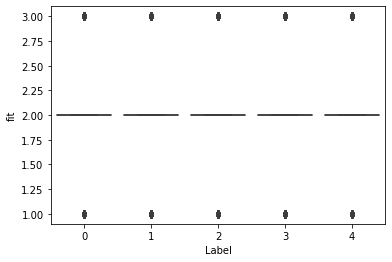

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


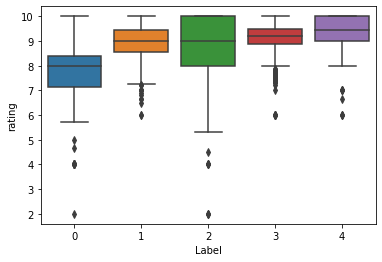

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


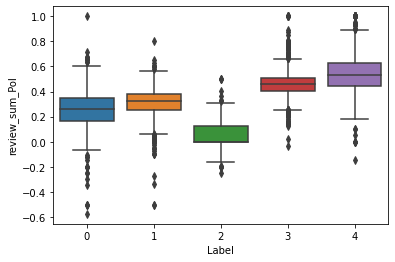

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


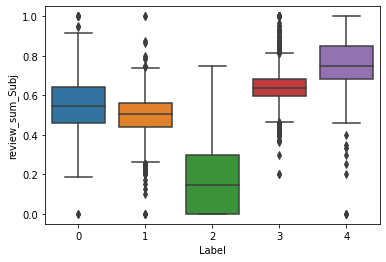

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


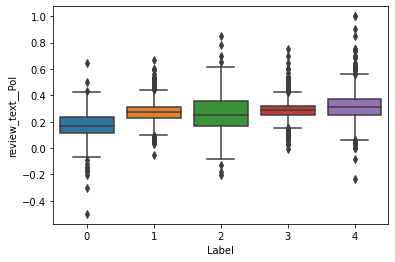

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


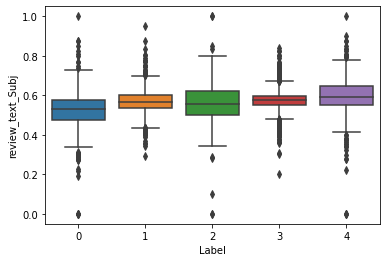

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


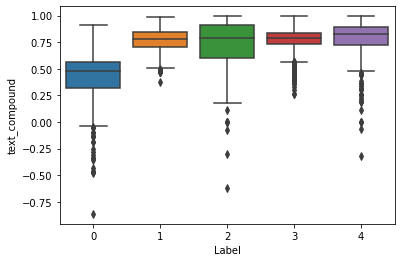

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


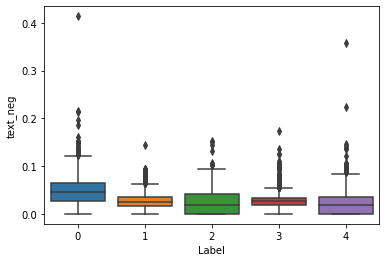

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


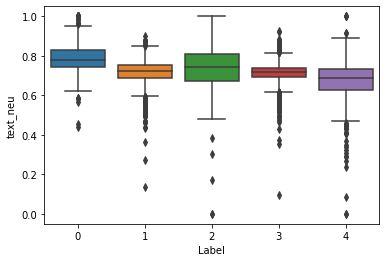

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


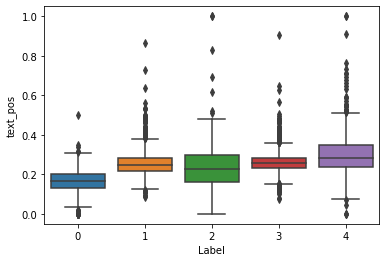

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


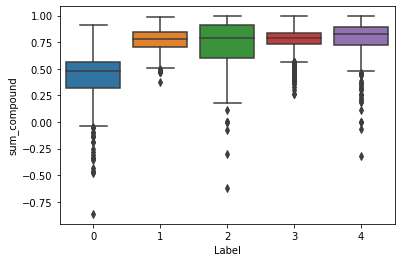

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


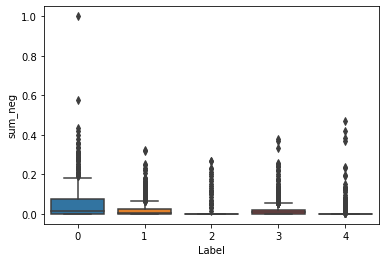

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


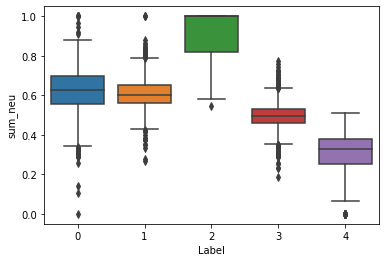

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


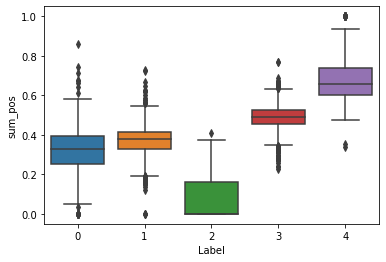

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


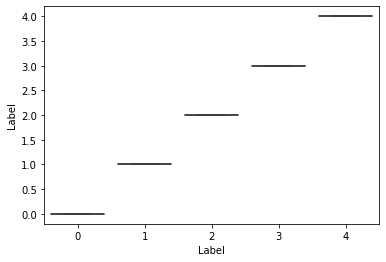

In [118]:
for i in kmean_out_item.columns:
    sb.boxplot(kmean_out_item['Label'],kmean_out_item[i])
    plt.show()